***Интерполяция с помощью полинома Лагранжа***

In [132]:
from IPython.display import Latex
from math import sin,cos, atan, pi
import pandas as pd
from matplotlib import pyplot as plt

Поиск машинного нуля

In [133]:
def machine_zero():
    if hasattr(machine_zero, 'zero'):
        return machine_zero.zero
    base = 1.0
    zero = base
    while base + zero / 2 > base:
        zero /= 2
    setattr(machine_zero, 'zero', zero)
    return zero

In [134]:
machine_zero()

2.220446049250313e-16

**Вычисление полинома ньютона:**

In [135]:
%%latex
\begin{align}
Ln = \sum_{i=0}^{n}f_{i}*\prod_{j=0, j\not\equiv i}^{n}*\frac{x - x_{j}}{x_{i} - x_{j}}
\end{align}

<IPython.core.display.Latex object>

Вычисление полинома Лагранжа для заданного массива функций для интерполяции

In [136]:
def product(i, x_arr, x):
    product = 1.0
    for j, x_j in enumerate(x_arr):
        if j != i:
            product *= (x - x_j) / (x_arr[i] - x_j)
    return product

def lagrange_poly(f_arr, x_arr, x):
    """
    :param f_arr: Массив значений функции для интерполяции
    :param x_arr: сетка значений аргумента функции
    :param x: Аргумент интерполяционного полинома
    """
    assert isinstance(f_arr, (list, tuple))
    assert isinstance(x_arr, (list, tuple))
    assert isinstance(x, float)
    assert len(x_arr) == len(f_arr)
    Ln = 0
    for i, f in f_arr:
        prod = product(i, x_arr, x)
        Ln += f * prod
    return Ln

Вычисление полинома Ньютона для заданной функции и сетки.

In [137]:
def lagrange_poly_by_func(f, x_arr, x):
    """
    :param f: Известная функция для интерполяции
    :param x_arr: сетка значений аргумента функции
    :param x: Аргумент интерполяционного полинома
    """
    assert isinstance(x_arr, (list, tuple))
    assert isinstance(x, float)
    assert callable(f)
    Ln = 0
    for i, x_i in enumerate(x_arr):
        prod = product(i, x_arr, x)
        Ln += f(x_i) * prod
    return Ln

**Функция, заданная для численной интерполяции:**

In [138]:
%%latex
\begin{align}
sin^3(\frac{x}{3})*arctan(x), x\in [0,10]
\end{align}

<IPython.core.display.Latex object>

In [139]:
def f(x):
    return sin(x/3) ** 3 * atan(x)

**Сетка для интерполяции**

In [140]:
def get_interpolation_net(a,b, count):
    return [a + (b - a) * i / count for i in range(count+1)]

In [141]:
def get_check_net(interpolation_net):
    check_net = []
    for i, _ in enumerate(interpolation_net):
        if i == len(interpolation_net) - 1:
            break
        check_net.append(interpolation_net[i] + (interpolation_net[i+1] - interpolation_net[i]) / 2)
    return check_net

In [142]:
def get_interpolation_result(f, interpol_net, check_net):
    common_net = sorted(interpol_net + check_net)
    interpolations = [lagrange_poly_by_func(f, interpol_net, x) for x in common_net]
    error = [f(common_net[i]) - interpolations[i] for i in range(len(common_net))]
    
    f_x = [f(x) for x in common_net]
    
    output = pd.DataFrame(data={'x': common_net, 'f(x)': f_x, 'Ln': interpolations, 'delta(Ln)': error}, columns=[ 'x', 'f(x)','Ln', 'delta(Ln)'])
    return output

Интерполяция для сетки шагом 1 от 0 до 10, для значений от 0 до 10 с шагом 0.5

In [143]:
interpol_net = get_interpolation_net(0, 10, 30)
normal_net_inter = get_interpolation_result(f, interpol_net, get_check_net(interpol_net))
normal_net_inter

,x,f(x),Ln,delta(Ln)
0,0.000000,0.000000,0.000000,0.000000e+00
1,0.166667,0.000028,0.000031,-3.059151e-06
2,0.333333,0.000439,0.000439,0.000000e+00
3,0.500000,0.002117,0.002117,1.009642e-07
4,0.666667,0.006295,0.006295,0.000000e+00
5,0.833333,0.014326,0.014326,-5.047456e-09
6,1.000000,0.027511,0.027511,0.000000e+00
7,1.166667,0.046996,0.046996,3.322638e-10
8,1.333333,0.073704,0.073704,0.000000e+00
9,1.500000,0.108299,0.108299,-2.459102e-11


**Построение сетки по корням полинома Чебышева**

*Полином чебышева имеет вид:*

In [144]:
%%latex
\begin{align}
P_{n} = cos(n * arccos(x))
\end{align}

<IPython.core.display.Latex object>

*Тогда корни этого многочлена будут иметь вид:*

In [145]:
%%latex
\begin{align}
x_{k} = cos(\frac{(2k+1)*\pi}{2n}), (k=0,1,...,n-1)
\end{align}

<IPython.core.display.Latex object>

In [146]:
def chebyshev_poly(n):
    return list(sorted([cos((2*k+1)*pi/2/n) for k in range(n)]))

In [147]:
%%latex
\begin{align}
Узлы \space сетки \space x_{k}\in[-1,1]. Следовательно, чтобы \space получить \space сетку \newline на \space произвольном \space интервале: \space  t_{k}\in[a,b] \space 
t_{k} \space примет \space вид: t_{k} = a + (1 + x_{k}) * \frac{(b - a)}{2}
\end{align}

<IPython.core.display.Latex object>

In [148]:
def chebyshev_poly_range(a,b,n):
    return [a + (1 + x) * (b - a) / 2 for x in chebyshev_poly(n)]

In [149]:
chebyshev_net = chebyshev_poly_range(0,10,30)
chebyshev_result = get_interpolation_result(f, chebyshev_net, get_check_net(chebyshev_net))
chebyshev_result

,x,f(x),Ln,delta(Ln)
0,0.006852,8.165456e-11,8.165456e-11,0.000000e+00
1,0.034205,5.067724e-08,5.113116e-08,-4.539243e-10
2,0.061558,5.310599e-07,5.310599e-07,0.000000e+00
3,0.115965,6.663121e-06,6.661770e-06,1.351379e-09
4,0.170371,3.085795e-05,3.085795e-05,0.000000e+00
5,0.251234,1.440564e-04,1.440591e-04,-2.677137e-09
6,0.332098,4.323025e-04,4.323025e-04,0.000000e+00
7,0.438533,1.277144e-03,1.277140e-03,4.091548e-09
8,0.544967,2.942048e-03,2.942048e-03,0.000000e+00
9,0.675807,6.623315e-03,6.623320e-03,-5.154235e-09


Построение графиков

In [150]:
def get_interpolation_plot(f, interpol_net, check_net):
    common_net =check_net
    interpolations = [lagrange_poly_by_func(f, interpol_net, x) for x in common_net]
    error = [f(common_net[i]) - interpolations[i] for i in range(len(common_net))]
    
    f_x = [f(x) for x in common_net]
    
    output = pd.DataFrame(data={'x': common_net, 'f(x)': f_x, 'Ln': interpolations, 'delta(Ln)': error}, columns=[ 'x', 'f(x)','Ln', 'delta(Ln)'])
    return output

In [151]:
plot_net = [i/100 for i in range(1000)]
normal_net_plot = get_interpolation_plot(f, interpol_net, plot_net)
chebyshev_net_plot = get_interpolation_plot(f, chebyshev_net, plot_net)

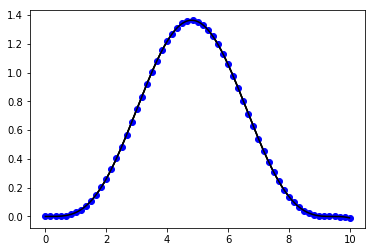

In [152]:
plt.plot(
    normal_net_plot['x'],
    normal_net_plot['f(x)'],
    'k',
    normal_net_plot['x'],
    normal_net_plot['Ln'],
    'k',
    normal_net_inter['x'],
    normal_net_inter['Ln'],
    'bo',
    chebyshev_net_plot['x'],
    chebyshev_net_plot['Ln'],
    'k'
)

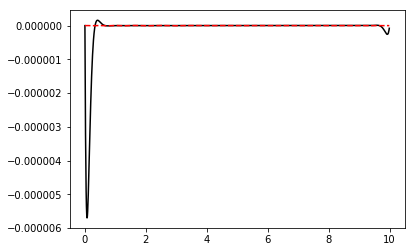

In [153]:
plt.plot(
    normal_net_plot['x'],
    normal_net_plot['delta(Ln)'],
    'k',
    normal_net_plot['x'],
    chebyshev_net_plot['delta(Ln)'],
    'r--'
)